# Setup

~~Create environment~~\
~~open file and create dataframe~~\
~~remove outliers using turkey outliers~~

# Figures and Table to Replicate

Figure 1\
Figure 2\
~~Figure 3~~\
Table 2\
Table 3\
~~Table 4~~\
Table 5\
Table 6\
Table 7

In [4]:
import pandas as pd
import math
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import spearmanr

In [27]:
# Reading input file and creating dataframe for analysis

df = pd.read_csv("/Users/admin/Desktop/SENG-480B-Final-Project-1/Input files/full.csv", sep=",")   
df["sloc"]=df['Insertions']+df['Deletions']
df.head()

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
0,C,ARMmbed/DAPLink,1,2015-06-26 19:25:11,2015-06-26 19:25:50,0,2,86,164,250
1,C,ARMmbed/DAPLink,10,2015-09-29 23:33:53,2015-09-30 19:38:09,1204,5,204,0,204
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
4,C,ARMmbed/DAPLink,110,2016-06-14 20:27:04,2016-07-20 13:58:13,51451,14,91,10,101


In [23]:
display(df)

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
0,C,ARMmbed/DAPLink,1,2015-06-26 19:25:11,2015-06-26 19:25:50,0,2,86,164,250
1,C,ARMmbed/DAPLink,10,2015-09-29 23:33:53,2015-09-30 19:38:09,1204,5,204,0,204
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
4,C,ARMmbed/DAPLink,110,2016-06-14 20:27:04,2016-07-20 13:58:13,51451,14,91,10,101
...,...,...,...,...,...,...,...,...,...,...
663276,TypeScript,yzhang-gh/vscode-markdown,890,2021-02-01 03:24:56,2021-02-01 06:01:20,156,8,342,159,501
663277,TypeScript,yzhang-gh/vscode-markdown,897,2021-02-10 15:50:03,2021-02-12 04:57:00,2226,11,1106,110,1216
663278,TypeScript,yzhang-gh/vscode-markdown,898,2021-02-10 22:14:42,2021-02-15 18:20:10,6965,1,112,39,151
663279,TypeScript,yzhang-gh/vscode-markdown,909,2021-03-05 21:21:14,2021-03-06 02:51:52,330,1,45,29,74


In [28]:
# Using turkey outlier to drop outliers in the data. This is the same method as the original study for continuity

def turkey_outlier(df, column, whisker_width=1.15):
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

# Example for whiskers = 1.5, as requested by the OP
table3=df.copy()
display(df)
display(df.describe())
df = turkey_outlier(df, 'Merge time minutes', whisker_width=1.5)
df = turkey_outlier(df, 'sloc', whisker_width=1.5)
display(df)
df.describe()

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
0,C,ARMmbed/DAPLink,1,2015-06-26 19:25:11,2015-06-26 19:25:50,0,2,86,164,250
1,C,ARMmbed/DAPLink,10,2015-09-29 23:33:53,2015-09-30 19:38:09,1204,5,204,0,204
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
4,C,ARMmbed/DAPLink,110,2016-06-14 20:27:04,2016-07-20 13:58:13,51451,14,91,10,101
...,...,...,...,...,...,...,...,...,...,...
663276,TypeScript,yzhang-gh/vscode-markdown,890,2021-02-01 03:24:56,2021-02-01 06:01:20,156,8,342,159,501
663277,TypeScript,yzhang-gh/vscode-markdown,897,2021-02-10 15:50:03,2021-02-12 04:57:00,2226,11,1106,110,1216
663278,TypeScript,yzhang-gh/vscode-markdown,898,2021-02-10 22:14:42,2021-02-15 18:20:10,6965,1,112,39,151
663279,TypeScript,yzhang-gh/vscode-markdown,909,2021-03-05 21:21:14,2021-03-06 02:51:52,330,1,45,29,74


,PR ID,Merge time minutes,Files changed,Insertions,Deletions,sloc
count,663281.000000,6.632810e+05,663281.000000,6.632810e+05,6.632810e+05,6.632810e+05
mean,3790.180982,1.557175e+04,11.243364,7.989713e+02,4.906456e+02,1.289617e+03
std,10307.998752,7.602061e+04,265.172605,3.267443e+04,1.909651e+04,3.921437e+04
min,1.000000,-4.500000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,334.000000,5.100000e+01,1.000000,3.000000e+00,1.000000e+00,5.000000e+00
50%,1127.000000,7.200000e+02,2.000000,1.400000e+01,4.000000e+00,2.200000e+01
75%,3269.000000,5.355000e+03,5.000000,7.100000e+01,2.200000e+01,1.070000e+02
max,167053.000000,3.792558e+06,84350.000000,1.406023e+07,6.644953e+06,1.406026e+07


,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
1,C,ARMmbed/DAPLink,10,2015-09-29 23:33:53,2015-09-30 19:38:09,1204,5,204,0,204
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
8,C,ARMmbed/DAPLink,120,2016-07-08 23:47:22,2016-07-10 21:40:21,2752,3,17,0,17
10,C,ARMmbed/DAPLink,122,2016-07-11 20:31:10,2016-07-11 23:15:21,164,3,7,7,14
...,...,...,...,...,...,...,...,...,...,...
663272,TypeScript,yzhang-gh/vscode-markdown,865,2020-12-11 02:58:13,2020-12-11 03:31:10,32,1,3,3,6
663273,TypeScript,yzhang-gh/vscode-markdown,869,2020-12-16 17:48:52,2020-12-17 13:42:16,1193,1,69,46,115
663278,TypeScript,yzhang-gh/vscode-markdown,898,2021-02-10 22:14:42,2021-02-15 18:20:10,6965,1,112,39,151
663279,TypeScript,yzhang-gh/vscode-markdown,909,2021-03-05 21:21:14,2021-03-06 02:51:52,330,1,45,29,74


,PR ID,Merge time minutes,Files changed,Insertions,Deletions,sloc
count,481305.000000,481305.000000,481305.000000,481305.000000,481305.000000,481305.000000
mean,4003.514969,1629.370942,3.013925,25.008670,11.115361,36.124032
std,11182.050213,2749.495890,18.296845,38.190531,21.168283,50.059459
min,1.000000,-45.000000,0.000000,0.000000,0.000000,0.000000
25%,332.000000,31.000000,1.000000,2.000000,1.000000,4.000000
50%,1130.000000,303.000000,2.000000,8.000000,3.000000,13.000000
75%,3337.000000,1675.000000,3.000000,30.000000,11.000000,46.000000
max,167053.000000,13311.000000,6632.000000,235.000000,235.000000,235.000000


In [ ]:
# Table 2: Distribution of outliers excluded based on SLOC. Random sample of N = 100.
#manually done 


In [29]:
# Table 3: Time-to-merge (hours) and SLOC per pull request before and after removing the outliers using Tukey 1.5×𝐼𝑄𝑅 fence. N = total number, M = mean, Mdn = median, SD = standard deviation.
#before filtering dataset
day=table3["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull=pd.DataFrame()
pull= table3.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID", "Files changed","Insertions","Deletions"])
before=pull.agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"N"})

#filter outliers
table3 = turkey_outlier(table3, 'Merge time minutes', whisker_width=1.25)
table3 = turkey_outlier(table3, 'sloc', whisker_width=1.25)

#after filtering dataset
day=df["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull=pd.DataFrame()
pull= table3.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID", "Files changed","Insertions","Deletions"])
after=pull.agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"N"})

#combining the before and after metrics
combine=pd.concat([before,after], axis=1)
df1 = pd.concat([before], keys=["before"], names=['type'],axis=1)
df2 = pd.concat([after], keys=["after"], names=['type'],axis=1)
combine=pd.concat([df1,df2], axis=1)
display(combine)

type             before                          after           
       Merge time hours          sloc Merge time hours       sloc
count     663281.000000           NaN    470285.000000        NaN
mean         260.045025   1289.616871        25.801578  33.446599
median        12.000000     22.000000         5.000000  13.000000
std         1267.004961  39214.369526        42.232814  45.213300

In [30]:
# Table 4 Time-to-merge (hours) and SLOC per pull request
# N = total number, M = mean, Mdn = median, SD = standard deviation.


day=df["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull=pd.DataFrame()
pull= df.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID", "Files changed","Insertions","Deletions"])
pull=pull.groupby(["Language"]).agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"count"})
display(pull)

Merge time hours                                    sloc         \
                      count       mean median        std       mean median   
Language                                                                     
C                     16308  34.990128   11.0  50.726976  36.309357   13.0   
CPP                   30808  32.961958   10.0  49.117690  39.483770   15.0   
CSharp                31415  26.475951    4.0  44.716610  41.929524   17.0   
Go                    40228  27.448146    5.0  45.535052  38.264095   15.0   
JavaScript            64665  28.379139    6.0  46.496576  33.423336   12.0   
Javascript               96  28.125000    9.5  44.990116  32.510417    9.5   
PHP                   98225  26.517903    5.0  45.621003  33.685640   12.0   
Python                64474  29.084127    7.0  46.338432  36.523188   13.0   
Ruby                  39806  29.080465    7.0  46.745600  31.143194   11.0   
TypeScript            95280  24.400115    4.0  42.783675  38.349381   15.0   

                       
                  std  
Language               
C           50.670790  
CPP         52.476313  
CSharp      54.212118  
Go          51.106392  
JavaScript  48.096135  
Javascript  46.808905  
PHP         48.172085  
Python      50.411571  
Ruby        46.052172  
TypeScript  51.420014

In [20]:
# Table 5: Spearman correlation coefficient 𝑟𝑠 (𝑝 < .001) between time-to-merge (hours) and total SLOC. N = total number.

temp = df.copy()
temp = temp[['Language', 'Merge time minutes', 'sloc']]
temp['Merge time minutes'] = temp['Merge time minutes']/60
# ttm.rename(columns = {"Merge time minutes": "Merge time hours"})

temp = temp.groupby(["Language"]).agg(N = ('Language','count'), sumMTM = ('Merge time minutes', 'sum'), sumSLOC = ('sloc', 'sum'))
#.corr(method='spearman').unstack()



#temp = temp.groupby(["Language"]).agg({"Merge time minutes": ['sum'], "sloc": ['sum']}).corr(method='spearman')
#print(temp)

#temp = temp[['Merge time minutes', 'sloc']]
#print(temp)

#print(temp.corr(method='spearman'))



#t5 = temp.groupby('Language')[['Merge time minutes', 'sloc']].corr(method='spearman').unstack()
#print(t5)


sloc = df[['Language', 'sloc']]


# #coef, p = spearmanr(ttm, sloc)
#print('Spearmans correlation coefficient: %.3f' % coef)

#alpha = 0.001
#if p<alpha:
   # print("good")

t5 = pd.DataFrame()
t5 = df.copy()
t5 = t5.groupby('Language')[['Merge time minutes', 'sloc']].corr(method='spearman').unstack().iloc[:,1]

#t5 = t5.groupby(["Language"]).agg({"Language":['count'], ['Merge time minutes']:})
#t5 = t5.to_frame()
#t5 = t5.rename(columns={'':'rs'}, inplace=True)
print(t5)
#list(t5.columns)


Language
C             0.097154
CPP           0.127601
CSharp        0.050411
Go            0.088199
JavaScript    0.049035
Javascript   -0.109962
PHP           0.059538
Python        0.128712
Ruby          0.116963
TypeScript    0.024068
Name: (Merge time minutes, sloc), dtype: float64


In [12]:
# Table 6: Spearman correlation coefficient 𝑟𝑠 (𝑝 < .001) between time-to-merge in hours and total SLOC in a pull request by pull request creation day. N = total number
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
t6=df.copy()
t6['create_date'] = pd.to_datetime(t6['Created At']).dt.date
t6['create_date'] = pd.to_datetime(t6['create_date'])
t6['day-of-week'] = t6['create_date'].dt.dayofweek
t6.sort_values(['day-of-week'],ascending=True)
t6['day-of-week']=t6['day-of-week'].map(dayOfWeek)

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
groups = t6.groupby(["day-of-week"]).agg({ 'Merge time minutes':['count']})
display(groups)

,Merge time minutes
,count
day-of-week,
Friday,53537
Monday,64246
Saturday,32167
Sunday,30962
Thursday,59434
Tuesday,65069
Wednesday,64115


Text(0, 0.5, '% of total pull requests')

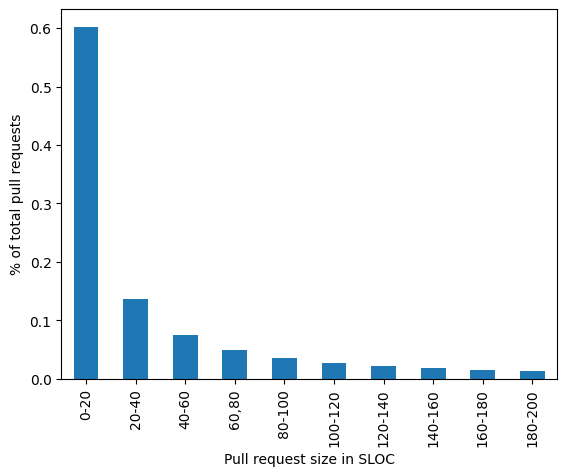

In [ ]:
# Figure 1: A barplot of pull request sizes
bins = [0, 20, 40, 60, 80,100,120,140,160,180,200]
fig1 = df.copy()
fig1['Pull request size in SLOC'] = pd.cut(fig1['sloc'], [0, 20, 40, 60, 80,100,120,140,160,180,200], labels=['0-20',"20-40", '40-60',"60,80","80-100",'100-120' ,'120-140', "140-160", '160-180',"180-200"])
groups = fig1.groupby(["Pull request size in SLOC"]).size()/total
ax=groups.plot.bar()
ax.set_ylabel("% of total pull requests")

Text(0, 0.5, '% of total pull requests')

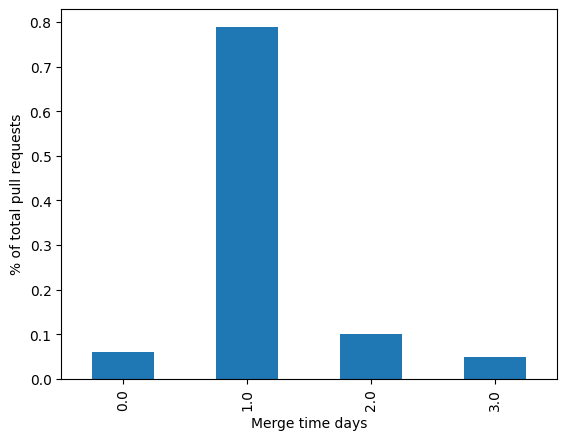

In [13]:
#Figure 2: A barplot of time-to-merge for pull requests.
fig2 = df.copy()
day=fig2["Merge time minutes"]/1440
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
fig2["Merge time days"]=day
total=len(fig2)
fig2.groupby(["Merge time days"])
groups = fig2.groupby(["Merge time days"]).size()/total
ax=groups.plot.bar()
ax.set_ylabel("% of total pull requests")

Text(0, 0.5, 'Merge time in hours')

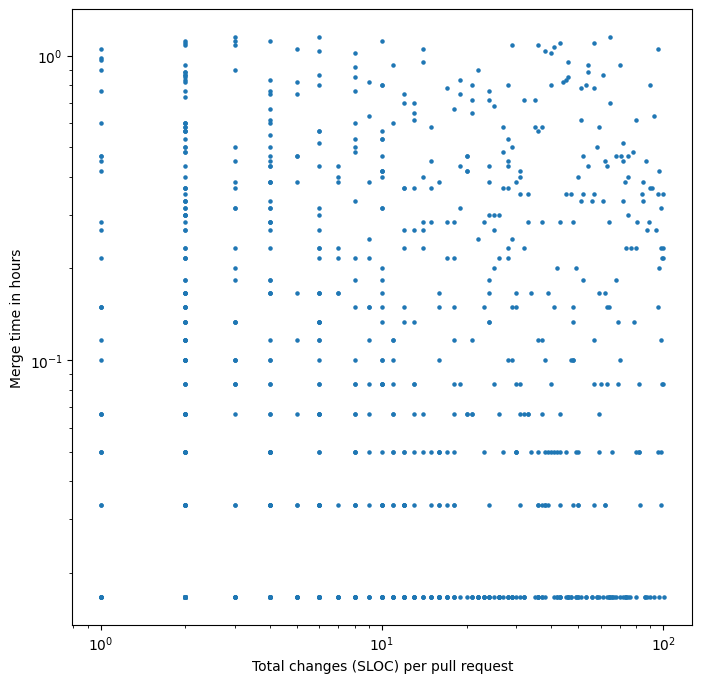

In [14]:
# Figure 3
# A scatter plot of pull request sizes and time-to-merge. Random sample of 𝑁 = 1,000 pull requests.
sloc=df.sample(n=1000,random_state=3)
day=sloc["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
sloc["Merge time minutes"]=day

plt.figure(figsize=(8,8))
plt.axes(xscale='log', yscale='log')
plt.scatter(sloc['sloc'], sloc["Merge time minutes"]/60,s=5)
plt.xlabel('Total changes (SLOC) per pull request')
plt.ylabel('Merge time in hours')